# SAXS&WAXS pipeline for calibrations of beamline parameters, including beam center, det-sam distance etc.


## Overview

* Setup: load packages/setup path
* Load Mask (made at the beamline)
* Check beam center
* Do circulare average to check the det-sam distance
* Export calibration results (mask data, beamline parameters) to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package (2019/11/6 by YG yuzhang@bnl.gov 
* V2: Develop make mask and check beam center using a qphi-analysis 
<br> $\;\;\;\;$   Develop the create mask option to make circle, rotated_line shapes 
<br> $\;\;\;\;$   Develop the qphi analysis to check the beam center
* V3: Develop automatically search beam center
* V4: Add more controls/functions for the creation of mask
* V5: use pyFAI detector class for create mask
      

## TODLIST
* 



In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })

plt.rcParams.update({ 'image.interpolation': 'none'   })
 

# WAXS--Setup paths

In [2]:
####
#username = 'yuzhang'
#inDir = '/home/%s/Test_SAXS/Data/'%username
#outDir = '/home/%s/Test_SAXS/Results/'%username

inDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/waxs/raw/'
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

create_fullpath(  outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/  already exists


'/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

## check one data

In [3]:
fp = 'AgBH_cali_5m_13.5kev_th0.000_1.00s_35545_waxs.tiff'
img = get_cms_img( fp, inDir ) 

<IPython.core.display.Javascript object>


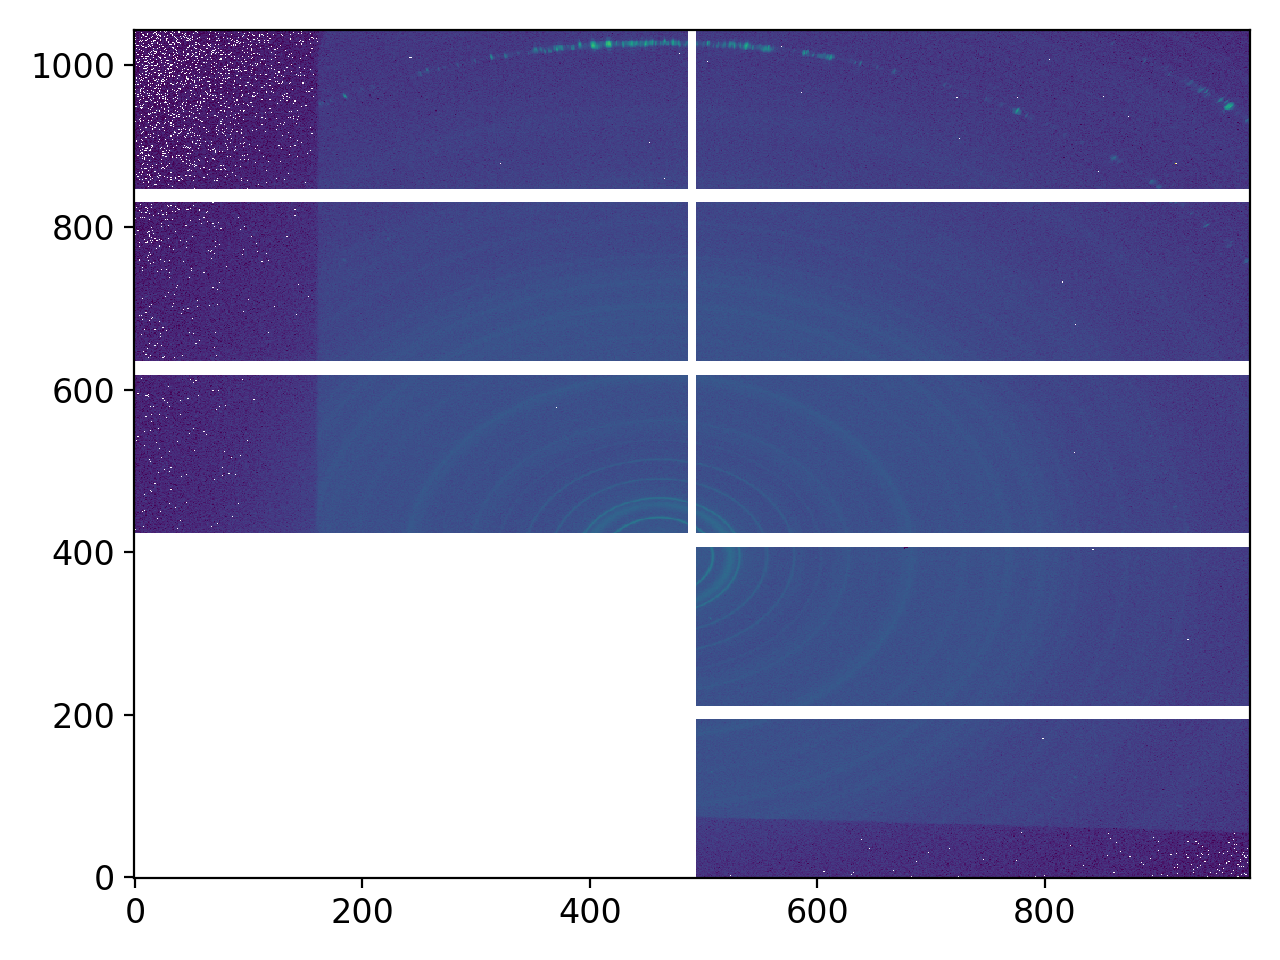

In [4]:
show_img( img , logs=True)

## create mask

In [5]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Detectors.py

## get the chip mask

In [6]:
det = get_detector( 'Pilatus800' )
maskw = det.calc_mask()

<IPython.core.display.Javascript object>


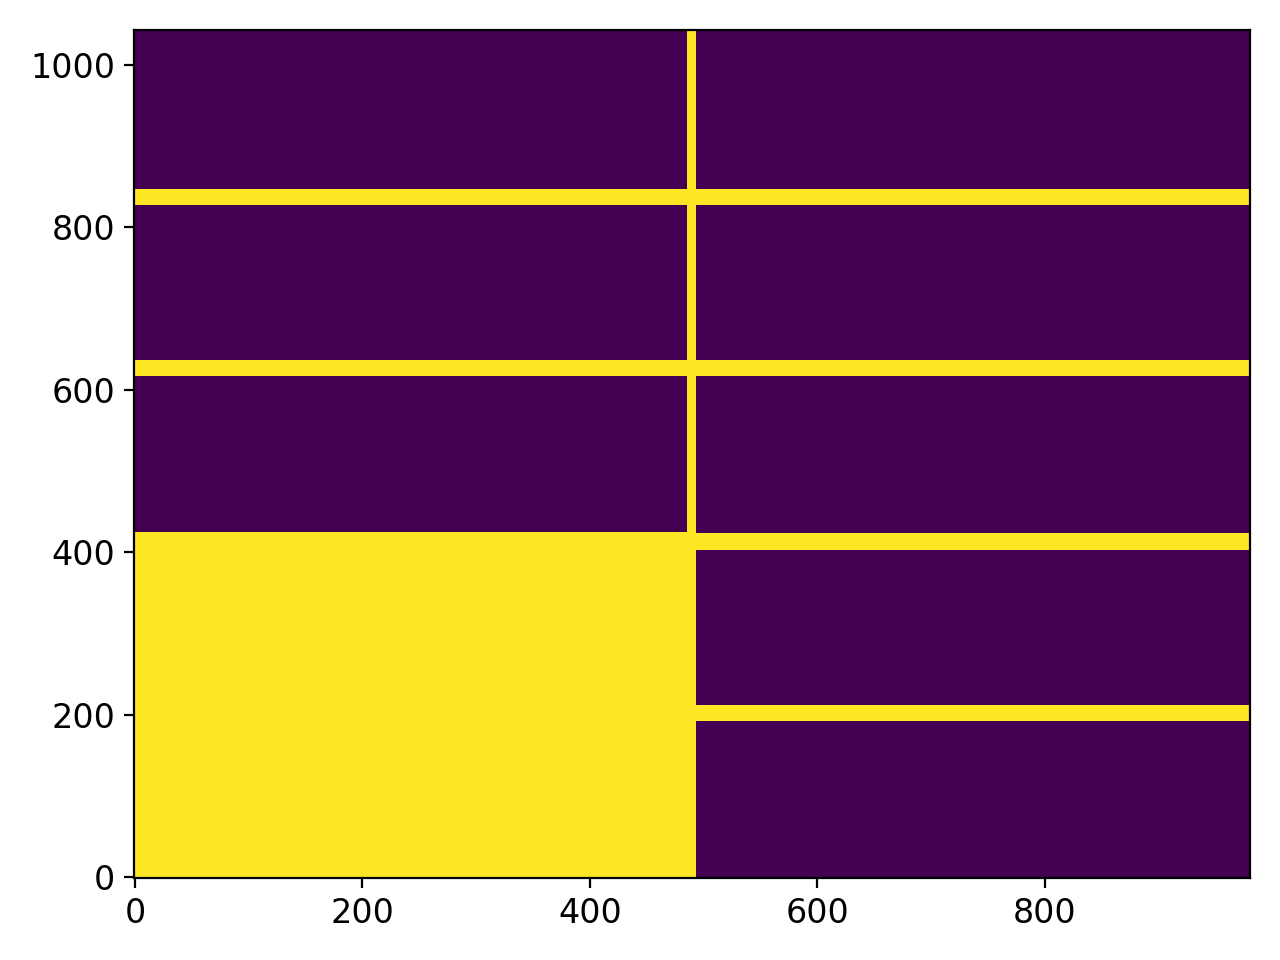

In [7]:
show_img( maskw )

## creaete the custom mask

In [8]:
maskwc= np.ones_like( maskw)
maskwc[ : 76, 492: ] = False
maskwc[ 424:, :164 ] = False
maskwc[ :,  485:494 ] = False
maskwc[ : 424, : 495 ] = False
maskwc = np.logical_not( maskwc )

maskw += maskwc

<IPython.core.display.Javascript object>


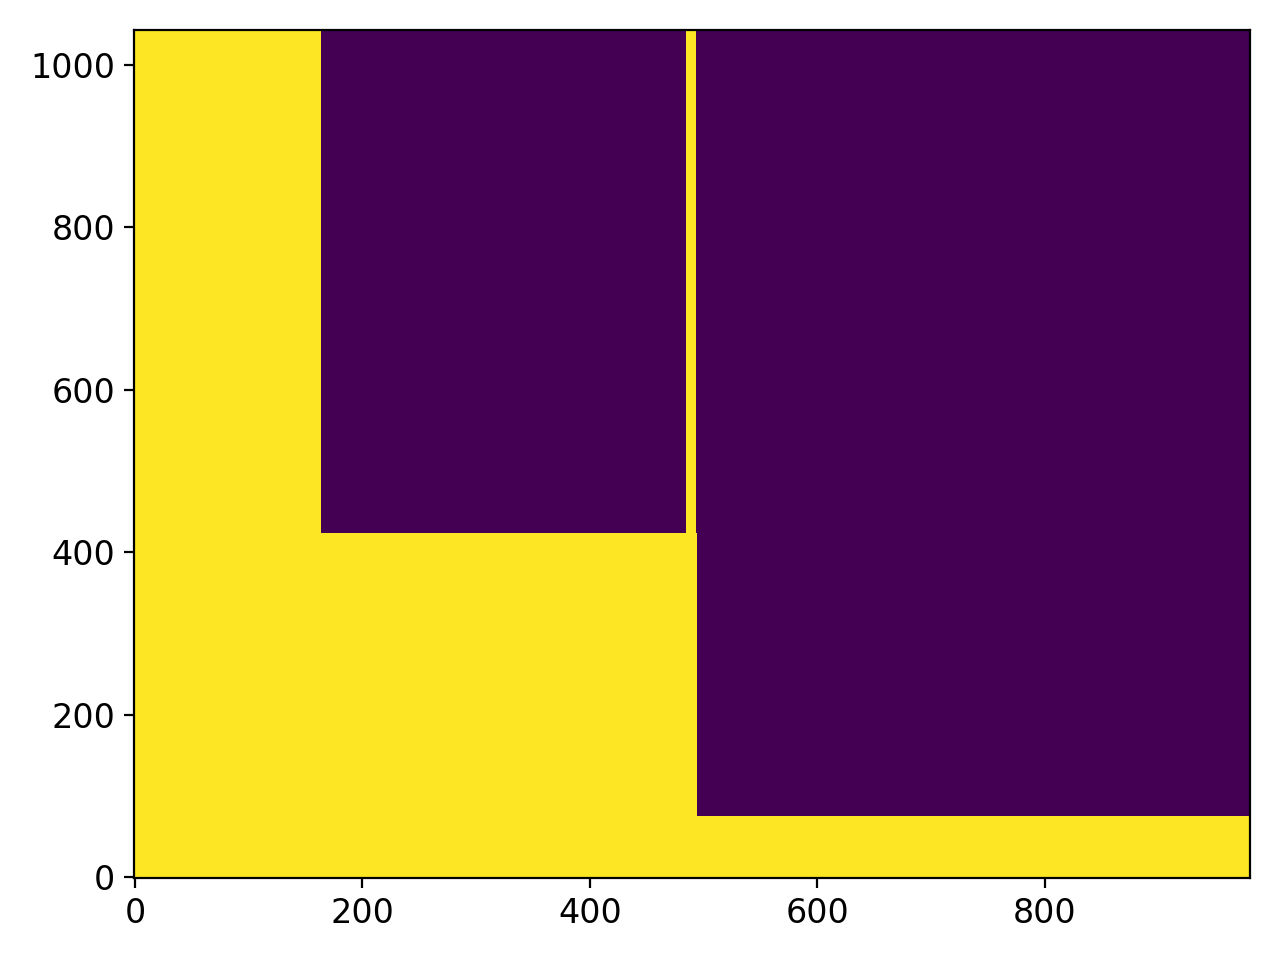

In [9]:
show_img(  maskwc )

<IPython.core.display.Javascript object>


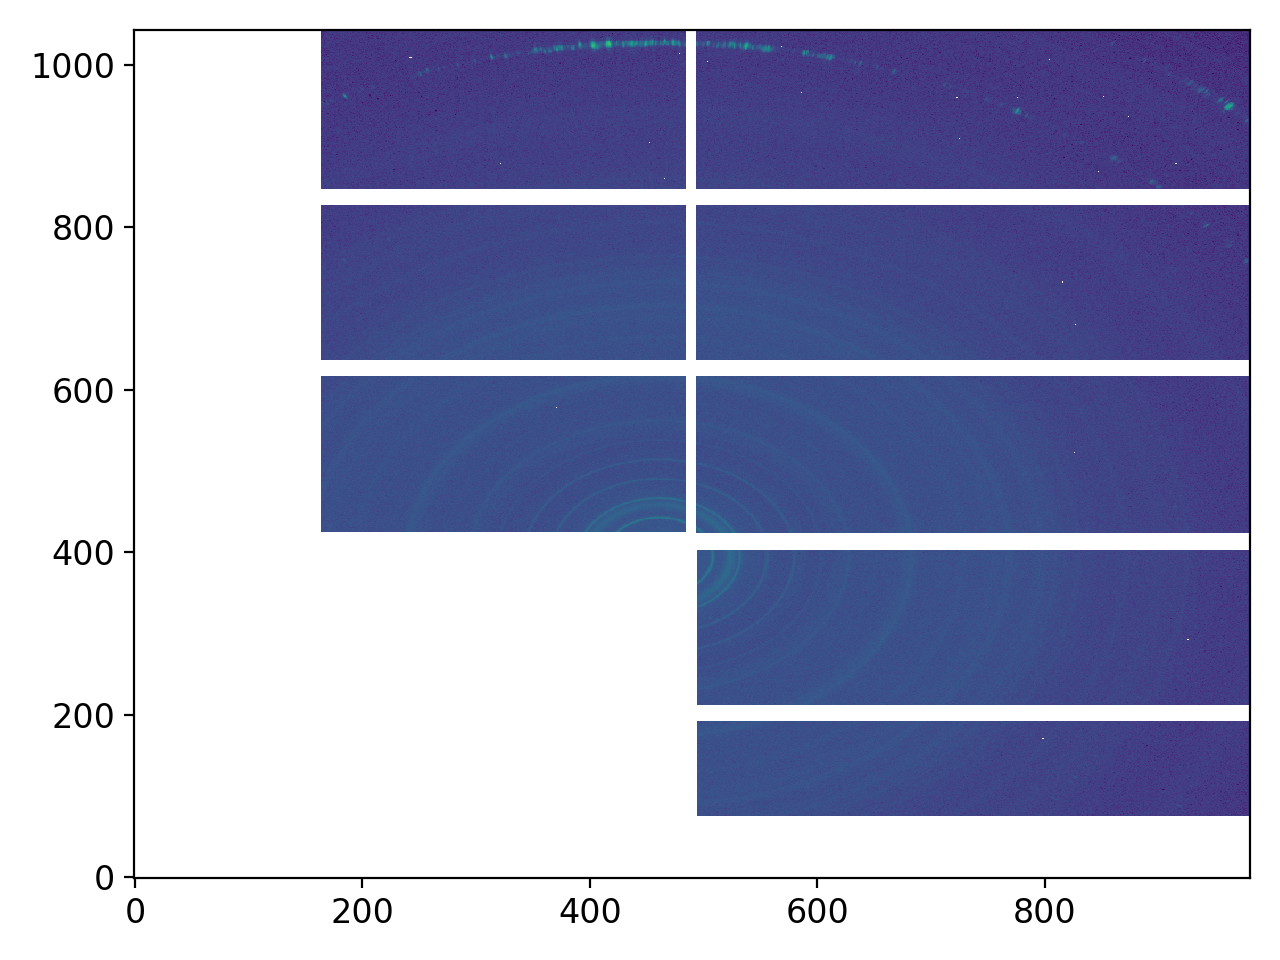

In [10]:
show_img( img * ~maskw, logs=True)

## Save the mask

In [88]:
np.save(  outDir + 'mask_waxs_2020C3_SWong', maskw[::-1] )
np.save(  outDir + 'mask_waxs_2020C3_SWong_noygap', maskwc[::-1] )


In [12]:
ls_dir( outDir)

array(['mask_waxs_2020C3_SWong.npy', 'mask_saxs_2020C3_SWong.npy',
       'mask_waxs_2020C3_SWong_noyap.npy',
       'mask_waxs_2020C3_SWong_noygap.npy',
       'mask_saxs_2020C3_SWong_noygap.npy'], dtype='<U33')

In [13]:
#m = np.load(  outDir + 'mask_waxs_2020C3_SWong.npy')

# SAXS

In [14]:
inDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/saxs/raw/'
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

create_fullpath(  outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/  already exists


'/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

In [72]:
fp = 'AgBH_cali_5m_13.5kev_th0.000_5.00s_35548_saxs.tiff'
fp = 'AM_Sam_5H_pos1_x0.200_y0.000_T-273.150C_1.00s_35721_saxs.tiff'
fp = 'AM_Sam_5H_pos1_x0.200_y0.000_T-273.150C_30.00s_35690_saxs.tiff'
fp = 'AM_Sam_4H_pos1_x0.200_y-0.200_T-273.150C_30.00s_35693_saxs.tiff'
fp =  'AM_Sam_4H_pos1_x0.200_y-0.500_T-273.150C_30.00s_35701_saxs.tiff'
fp='AM_Sam_1H_pos1_x-0.050_y-0.100_T-273.150C_30.00s_35719_saxs.tiff'



img = get_cms_img( fp, inDir ) 
img.shape

(1679, 1475)

<IPython.core.display.Javascript object>


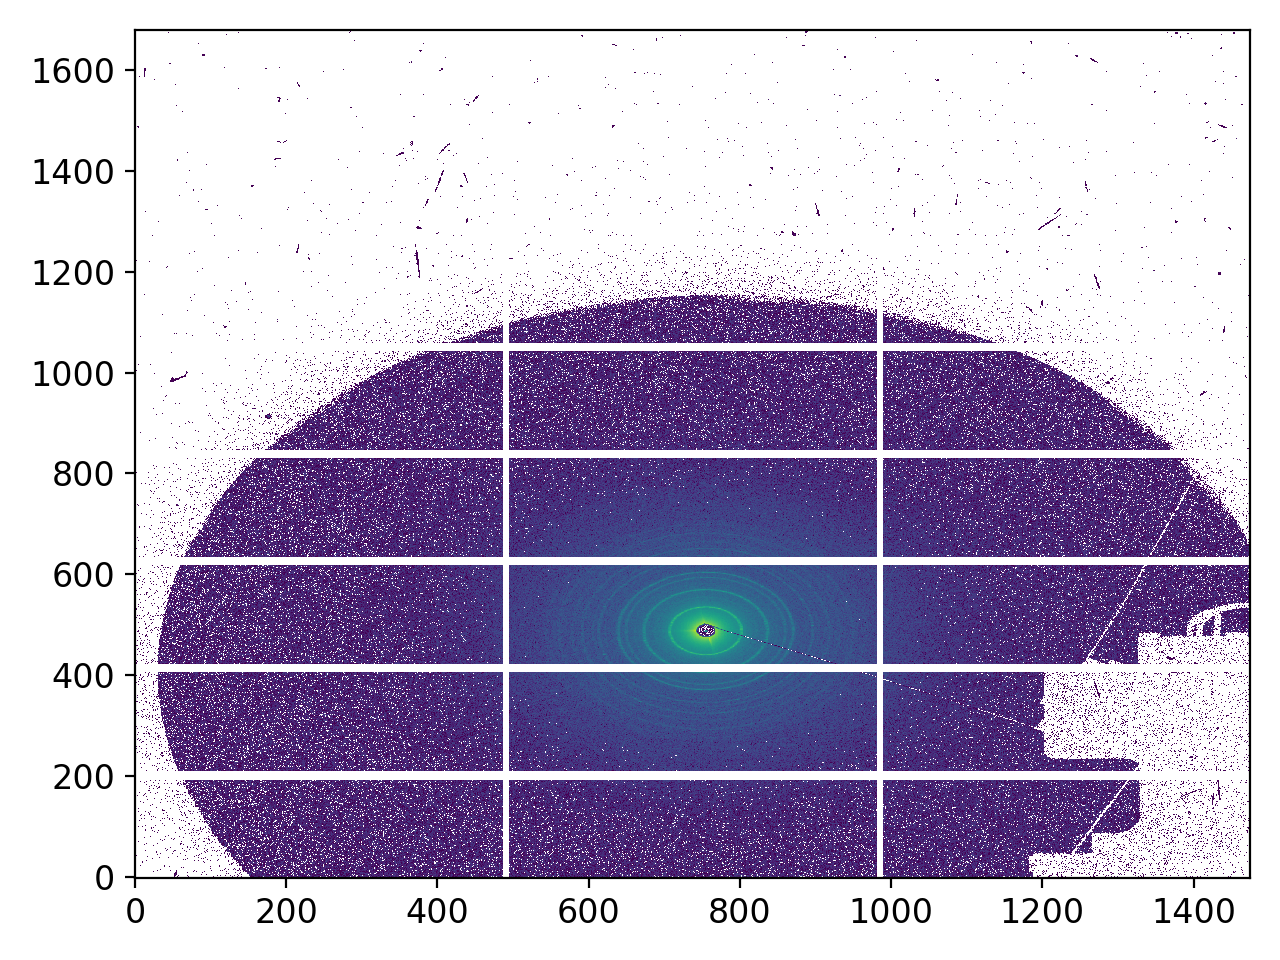

In [73]:
show_img( img , logs=True)

## get the chip mask

In [74]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Detectors.py

In [75]:
det = get_detector( 'Pilatus2m' )
masks =  det.calc_mask()

<IPython.core.display.Javascript object>


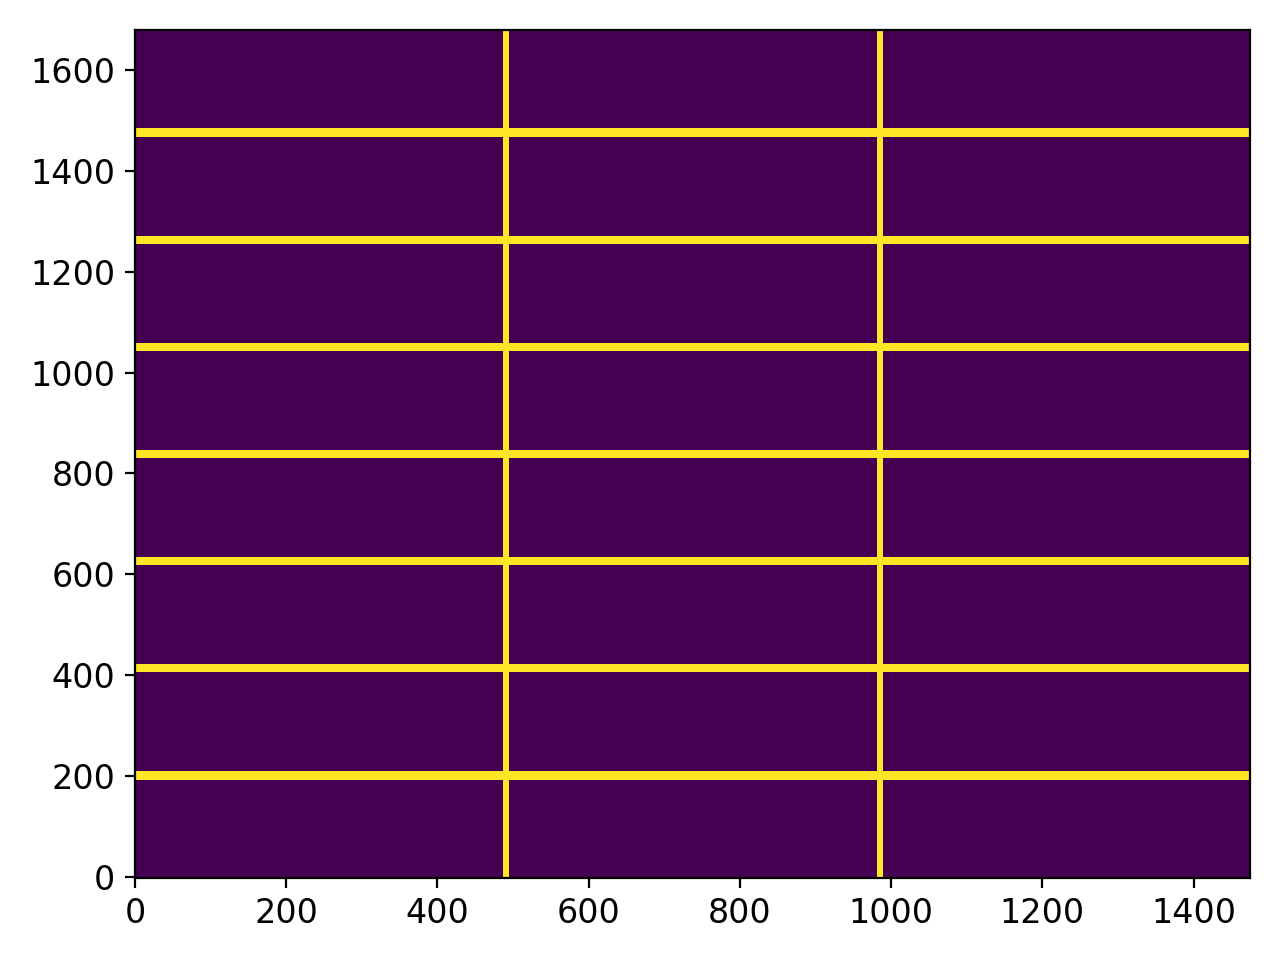

In [76]:
show_img( np.array( masks, dtype='int' )  )

<IPython.core.display.Javascript object>


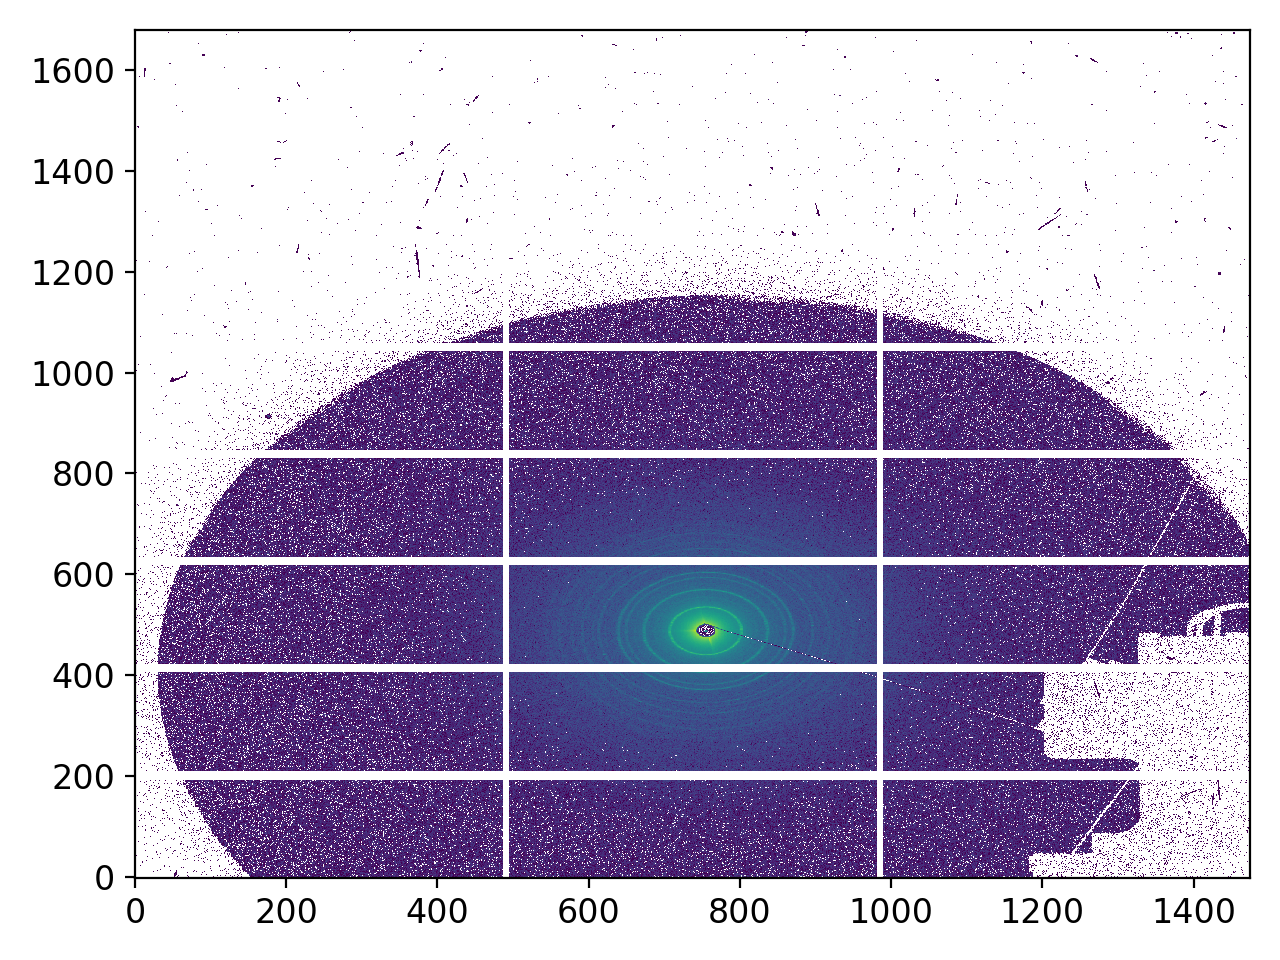

In [77]:
show_img( img  * ~masks , logs=True)

## create custom mask

In [78]:
cx,cy = [754, 604 ]
cx,cy = [754, 490 ]
#cx,cy = [754,  552 ]


In [79]:
604 - 552, 604-490

(52, 114)

In [80]:
cen_mask = create_cross_mask(   masks, center=[  cx,cy ],  
                                wy_left= 0, wy_right= 0, 
                                wx_up= 0, wx_down= 0, center_radius= 15 )
    
rot_mask = create_multi_rotated_rectangle_mask( masks,
                                                   #center = [    767,  610 ],     
                                                   center = [    767,  610 -114 ],   
                                                  #center = [    767,  610 - 52 ], 
                                                   length=1500,
                                                   width= 5, 
                                                   angles=[  115 ] ) 

win_mask = ~ create_cross_mask(   masks, center=[  cx,cy ],  
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius=  720 )
    

masko = np.ones_like( masks, dtype=bool)
masko[   :110,  1050:,] = False
masko[   :166 ,  1070:,] = False
masko[   :200 ,  1258:,] = False
masko[   :360 ,  1320:,] = False
masko[  340 : 555 ,  1195:,] = False
masko[  530  : 610  ,  1320:,] = False
masko[  590:670  ,  1380:,] = False
masko[  :,486:494  ] = False
masko[  :,980:988  ] = False
rot_masko1 = create_multi_rotated_rectangle_mask( masks,
                                                   center = [    1240,166 ], 
                                                   length= 500,
                                                   width=  8, 
                                                   angles=[   27 ] ) 
rot_masko2 = create_multi_rotated_rectangle_mask( masks,
                                                   center = [    1260, 555 ], 
                                                   length= 500,
                                                   width=  8, 
                                                   angles=[   22.3 ] ) 

masko *= rot_masko1 * rot_masko2
masksc = cen_mask * rot_mask * win_mask * masko
    
masksc = np.logical_not( masksc )
masks += masksc    

<IPython.core.display.Javascript object>


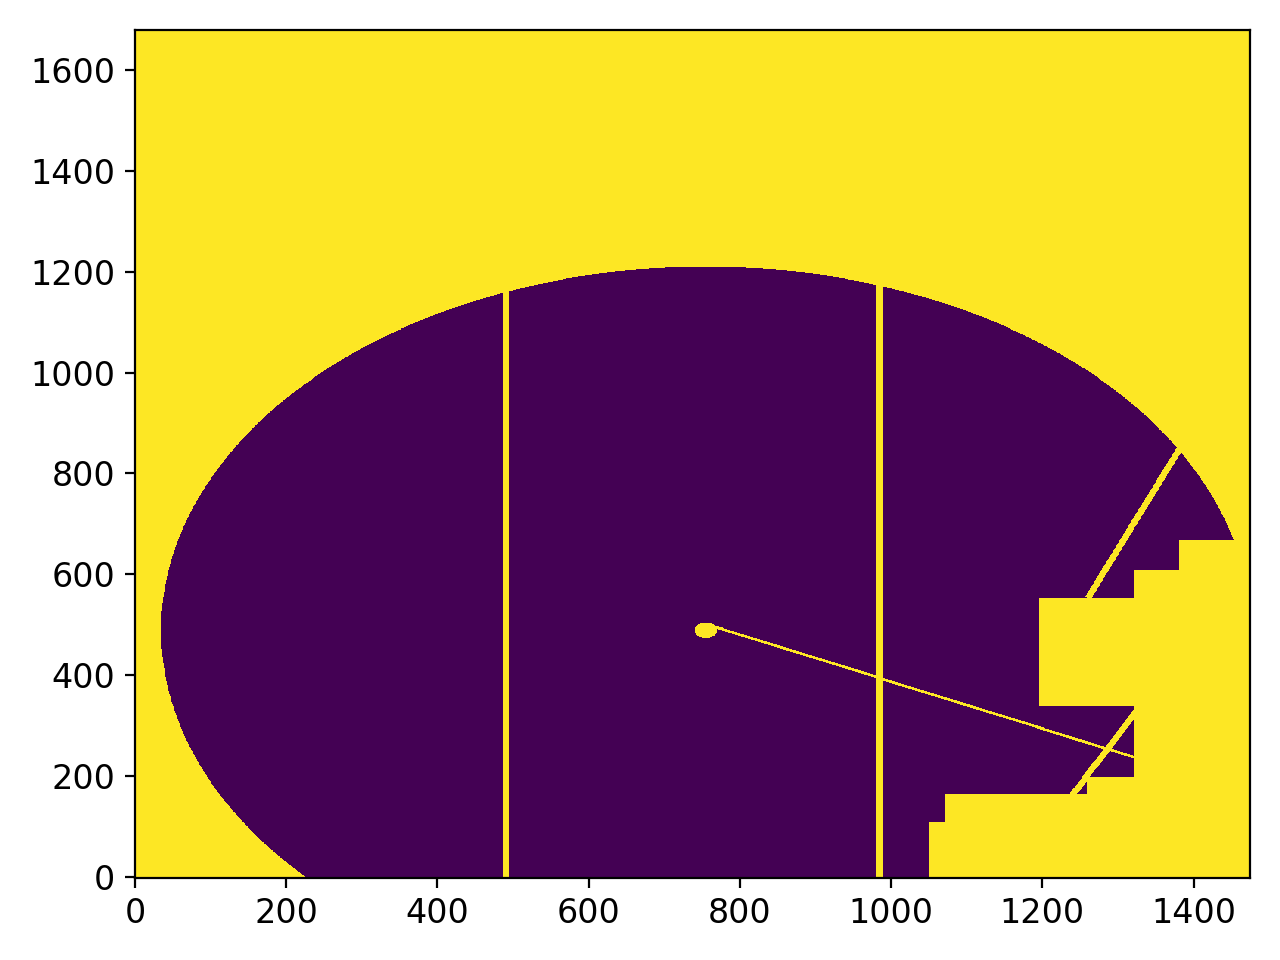

In [81]:
show_img(    masksc  )

<IPython.core.display.Javascript object>


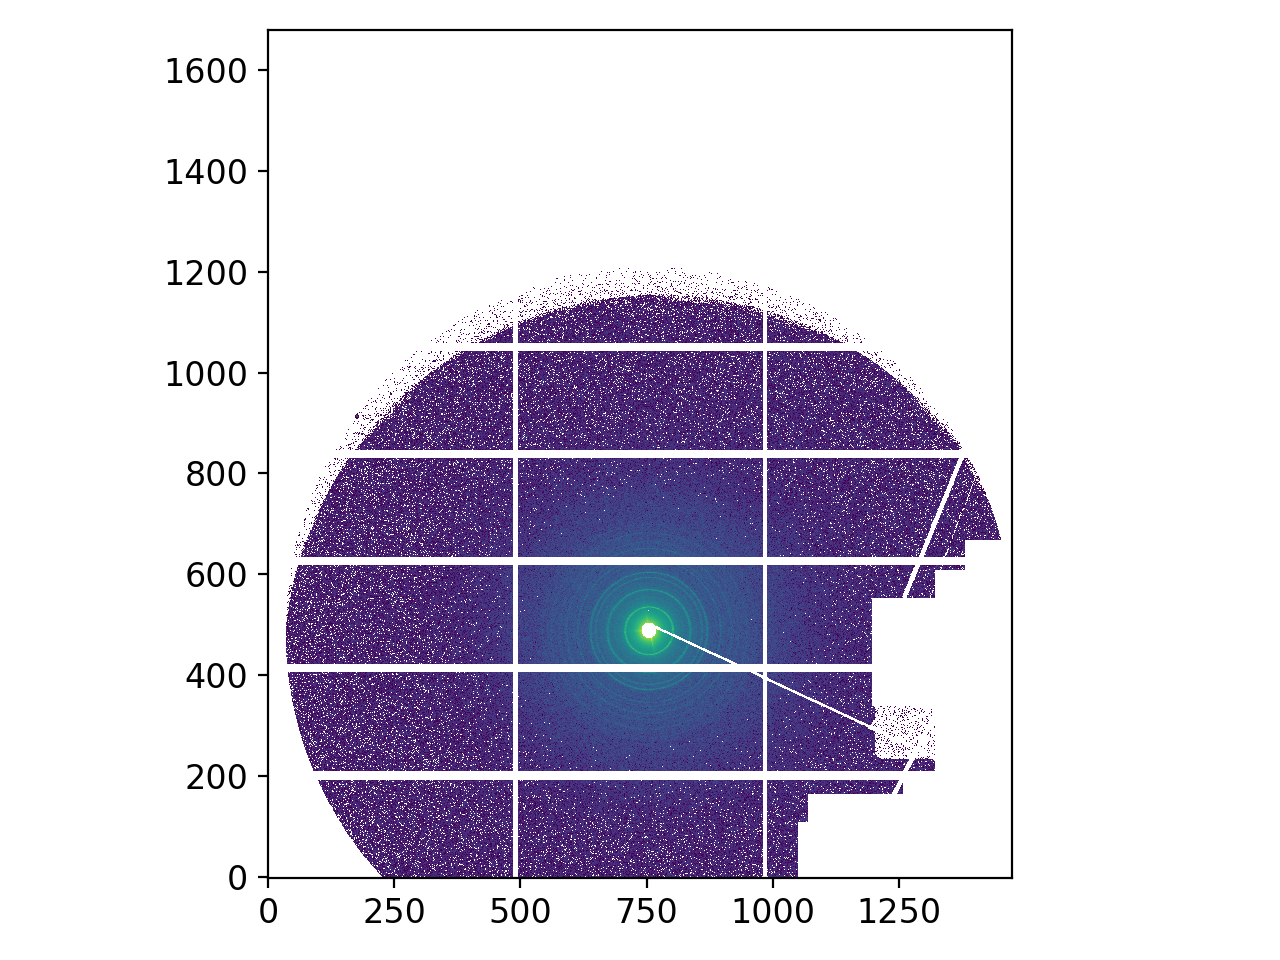

In [82]:
show_img(  img  *   ~masksc , logs=True, aspect=1)

## put all the mask together

<IPython.core.display.Javascript object>


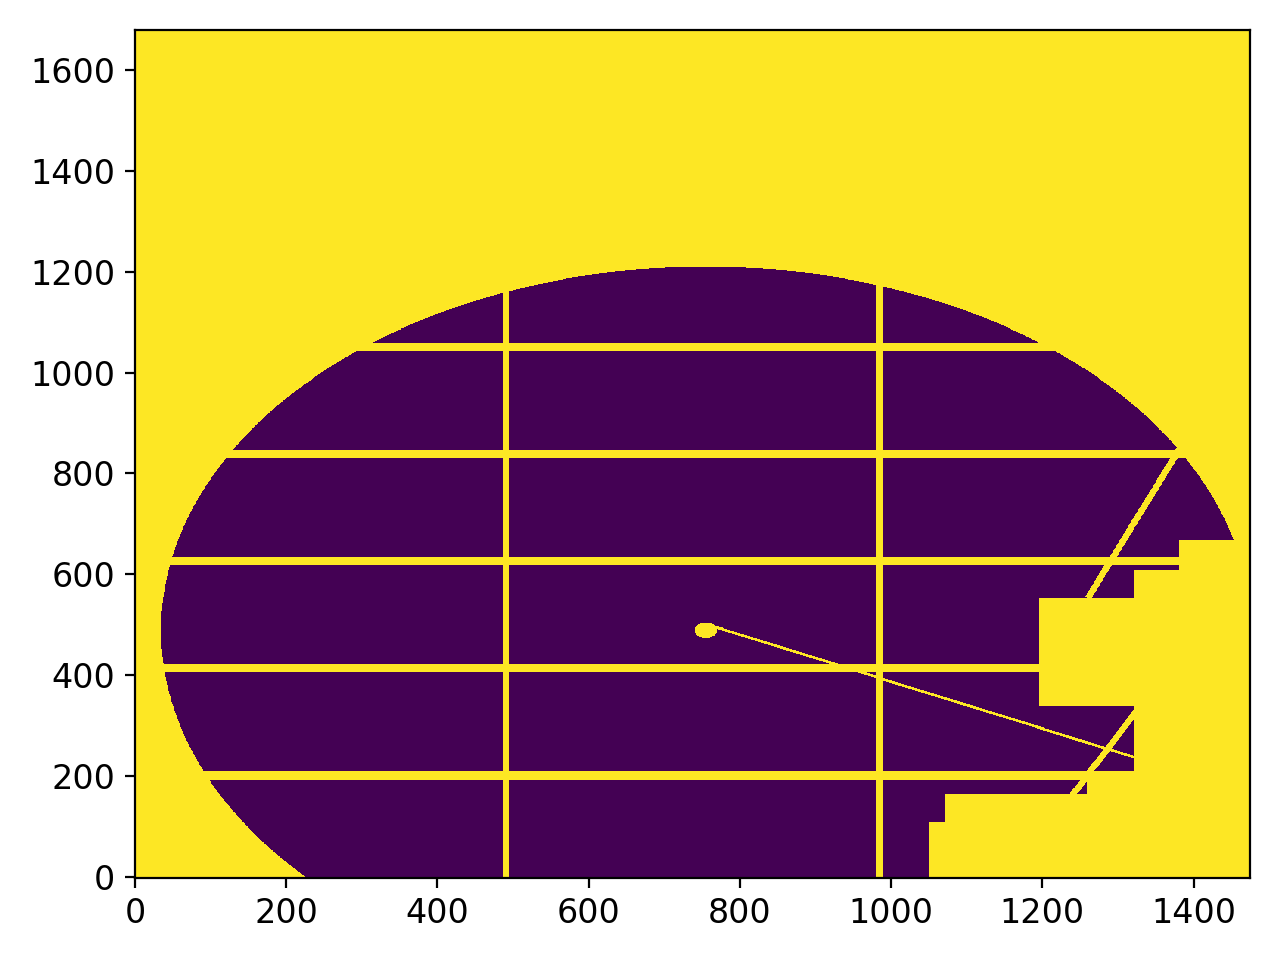

In [83]:
show_img( np.array( masks, dtype='int' )  )

## Save the mask

In [27]:
outDir

'/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

In [87]:
#np.save(  outDir + 'mask_saxs_2020C3_SWong', masks[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong2', masks[::-1] )

#np.save(  outDir + 'mask_saxs_2020C3_SWong', masks[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong_noygap2', masksc[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong_noygap3', masksc[::-1] )






In [29]:
#m=np.load( outDir + 'mask_saxs_2020C3_SWong.npy')
#show_img(m)

# The End